In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set visualization style
sns.set_theme(style="whitegrid")

df = pd.read_csv('../data/financial_risk_assessment.csv')

### DataFrame
This dataframe has 15k rows and 20 columns. For this project we are going to use financial risk data base with the next features:
- Age (age of individual, a continuous variable)
- Gender (gender of individual, categorized into Male, Female, and Non-binary)
- Educational Level (highest level of education achieved, ranging from High School to PhD)
- Marital Status (current marital status, categorized as Single, Married, Divorced, or Widowed)
- Income (annual income in USD, representing the individual's earning capacity)
- Credit Score (numeric value indicating creditworthiness, ranging from 600 to 800)
- Loan Amount (the amount loan requested by the individual, representing financial needs)
- Loan Purpose (the purpose of the loan, categorized into Home, Auto, Peronal, or Business)
- Employment status (Employment situation of the individual, including Employed, Unemployed, or Self-employed)
- Years at current (Duration of employment at the current job, reflecting job stability)
- Payment history (Historical payment performance, categorized into Excellent, Good, Fair, or Poor)
- Debt to income ratio (Ratio of debt to income, indicating financial leverage and risk.)
- Assets value (Total value of assets owned by the individual)
- Number of dependents (Number of dependents supported by the individual, affecting financial responsibilities)
- City (City where the individual resides, providing geographic context)
- State (State where the individual resides, giving further geographic detail)
- Country (Country of residence, adding a global perspective)
- Previous defaults (Number of previous loan defaults, indicating historical financial risk)
- Marital status change (Number of changes in marital status, reflecting personal life changes)
- Risk rating (Target column categorizing financial risk into Low, Medium, or High)

To know more about this dataset you can click on [financial risk dataset](https://www.kaggle.com/datasets/preethamgouda/financial-risk/data)

### EDA
#### Data Types
dtypes a method that helps us to identify the columns data types in our data frame.

In [5]:
df.dtypes

Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
Risk Rating               object
dtype: object

##### Preview the data

In [6]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

#### Summary statistics for numerical columns

In [13]:
df.describe(include=[np.number])

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


In [14]:
df.describe(include=['object'])

,Gender,Education Level,Marital Status,Loan Purpose,Employment Status,Payment History,City,State,Country,Risk Rating
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,3,4,4,4,3,4,10614,59,243,3
top,Non-binary,Bachelor's,Widowed,Personal,Employed,Good,East Michael,CO,Congo,Low
freq,5059,3829,3893,3771,5026,3822,19,282,124,9000


In [15]:
df.isnull().sum() # Check for missing (null) values

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

#### EDA with plots
##### Numerical features

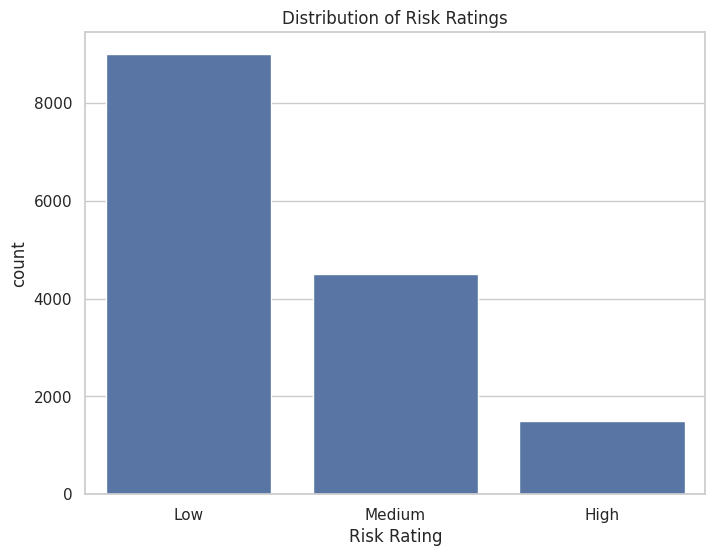

In [17]:
# Distribution of target variable
plt.figure(figsize=(8,6))
sns.countplot(x='Risk Rating', data=df)
plt.title('Distribution of Risk Ratings')
plt.show()

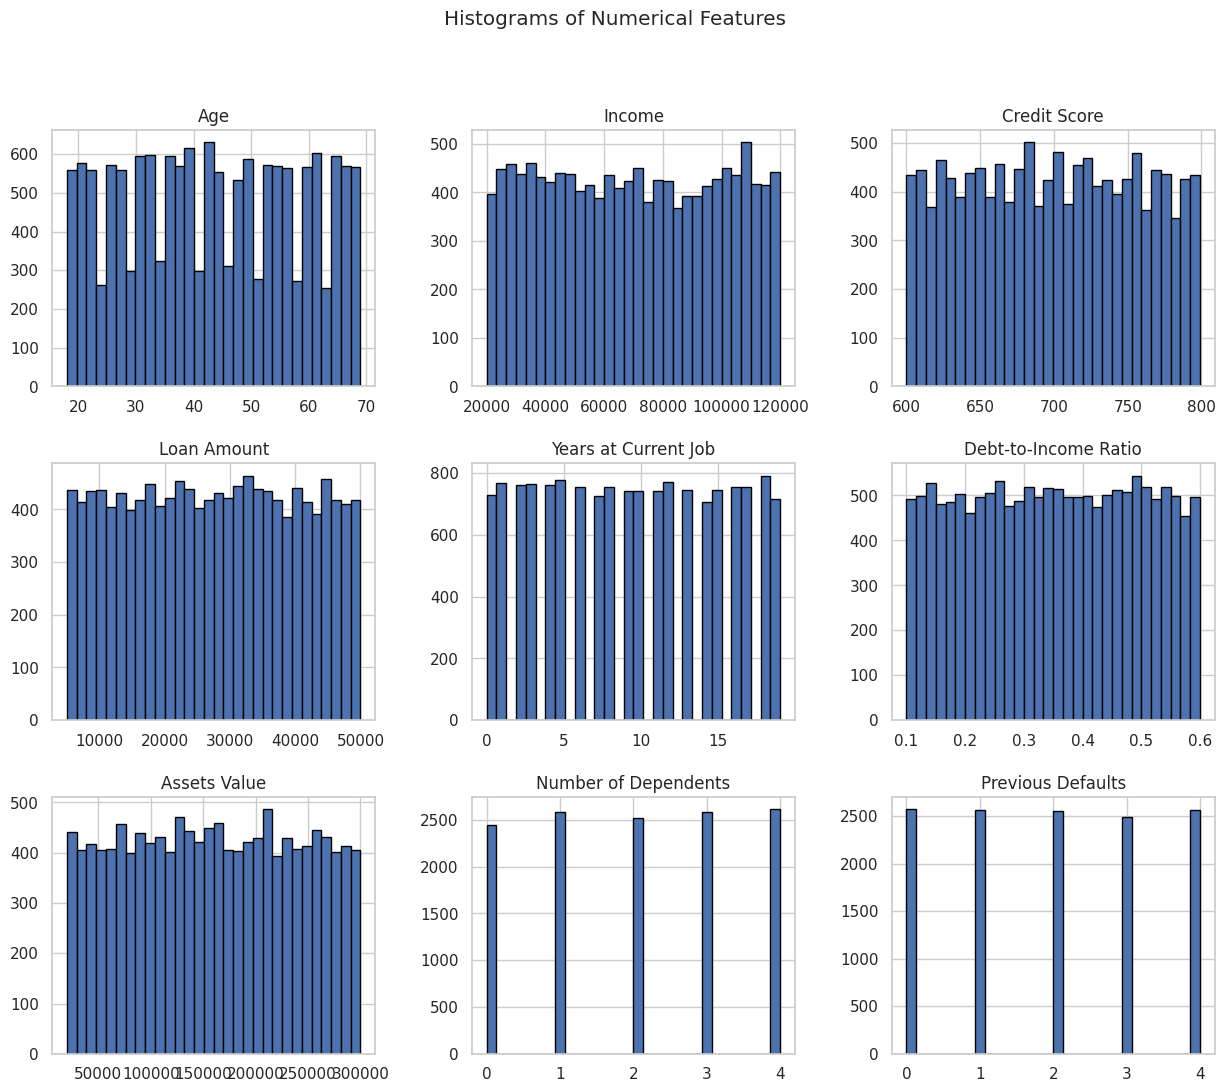

In [16]:
# Histograms for numerical features
num_features = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 
                 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults']
df[num_features].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

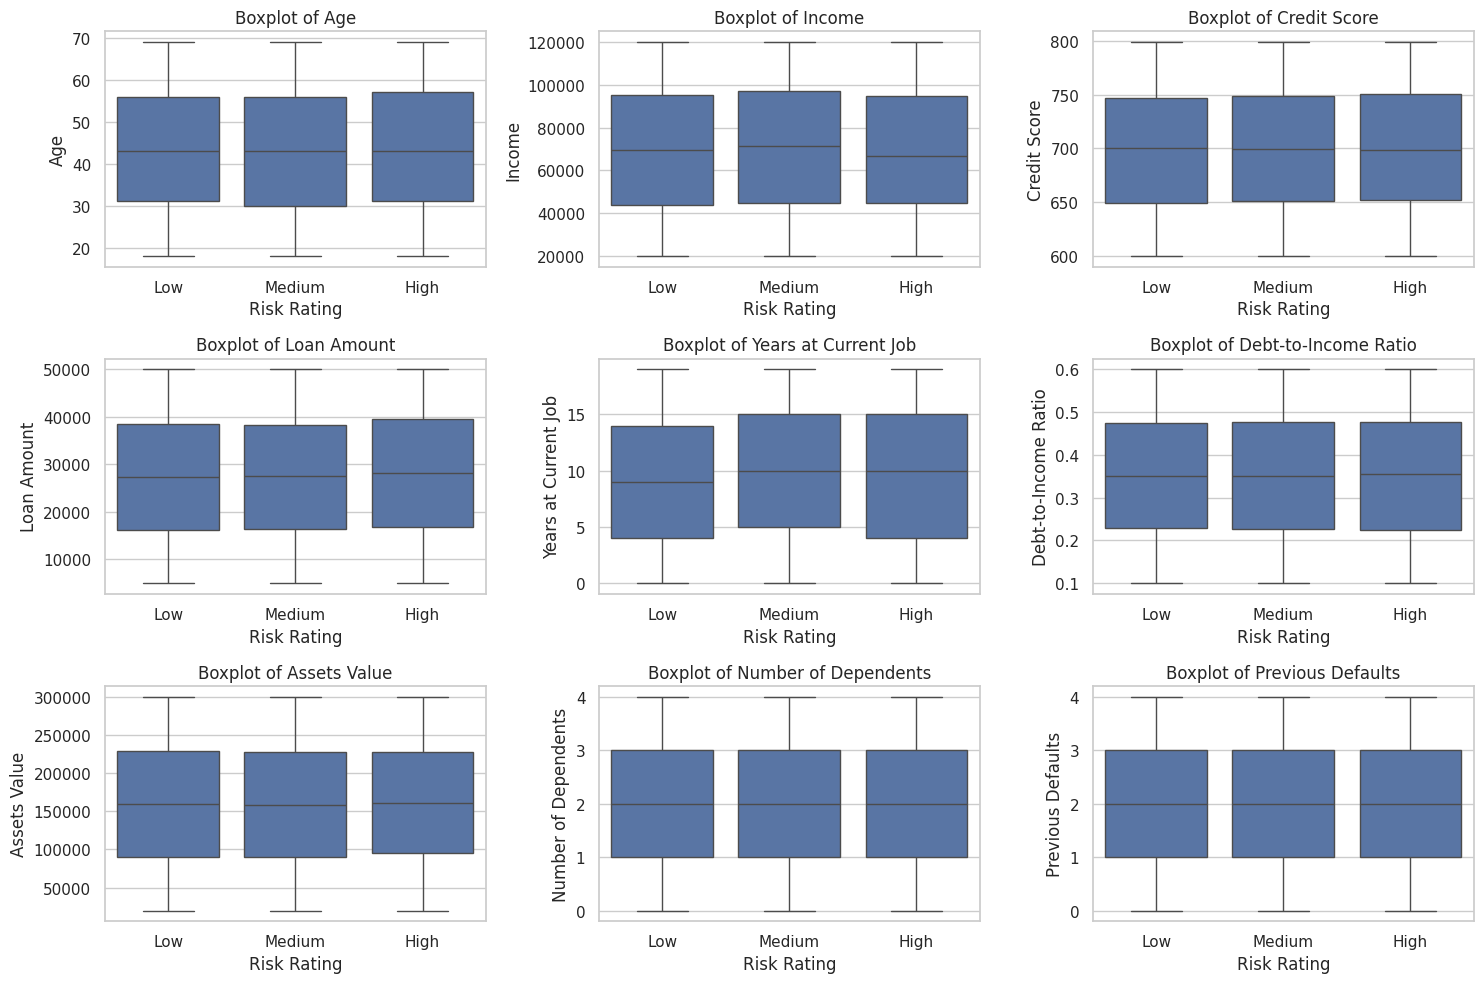

In [18]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Risk Rating', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

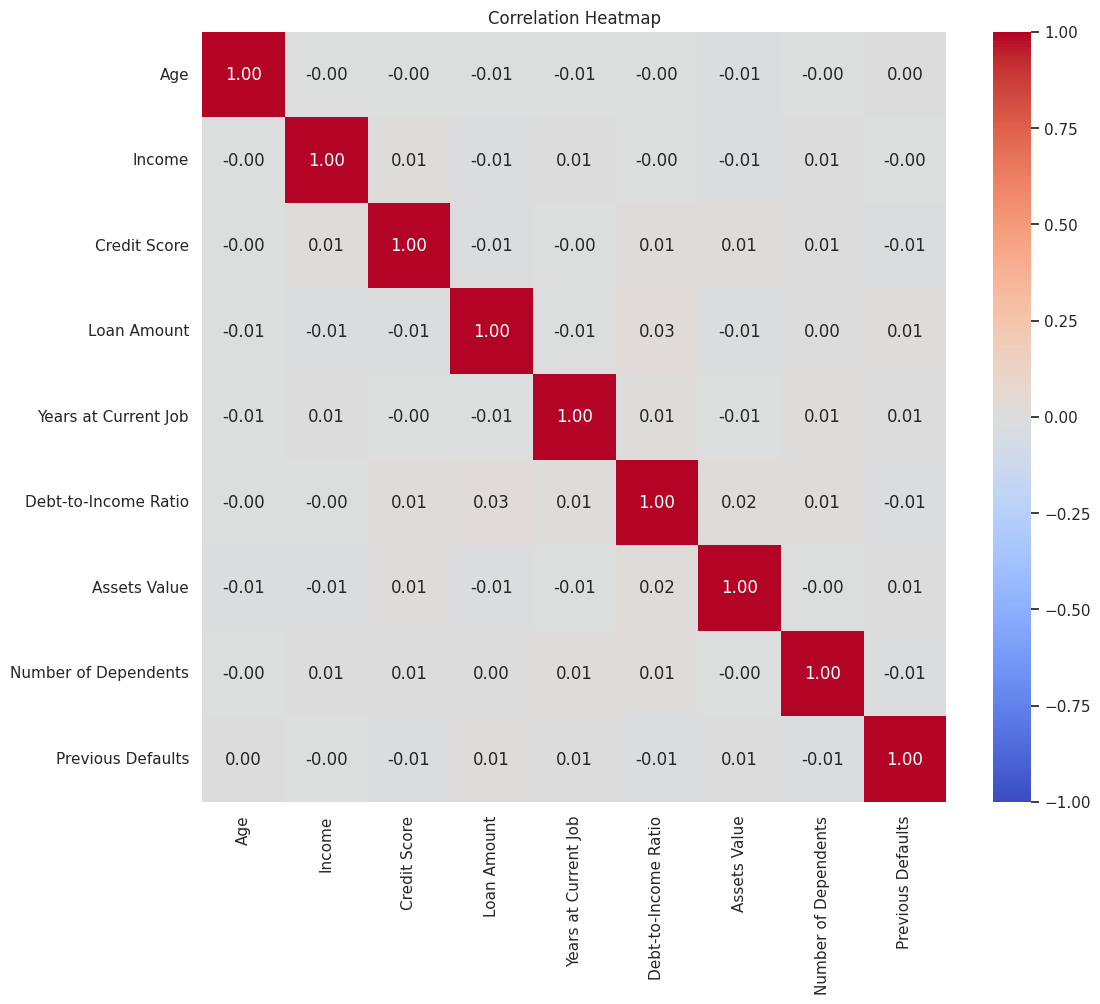

In [19]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,10))
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

##### Cetegorical Features

In [20]:
# Count of unique values in categorical columns
for column in ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 
                'Payment History', 'City', 'State', 'Country']:
    print(f'{column} unique values:')
    print(df[column].value_counts())
    print()

Gender unique values:
Gender
Non-binary    5059
Female        4990
Male          4951
Name: count, dtype: int64

Education Level unique values:
Education Level
Bachelor's     3829
High School    3774
PhD            3760
Master's       3637
Name: count, dtype: int64

Marital Status unique values:
Marital Status
Widowed     3893
Divorced    3787
Single      3697
Married     3623
Name: count, dtype: int64

Loan Purpose unique values:
Loan Purpose
Personal    3771
Home        3766
Business    3738
Auto        3725
Name: count, dtype: int64

Employment Status unique values:
Employment Status
Employed         5026
Self-employed    4991
Unemployed       4983
Name: count, dtype: int64

Payment History unique values:
Payment History
Good         3822
Excellent    3789
Poor         3716
Fair         3673
Name: count, dtype: int64

City unique values:
City
East Michael        19
Lake Michael        16
Port Michael        16
West Michael        13
Lake James          13
                    ..
East

In [ ]:
# Todo: Ask the bot if apparently we don't see a correlation with the numerical features and the target feature for our analysis
# we should consider them to train our model if it is ok we use the categorical variables. Look at the solution of the problem given since we
# aren't solving the same it can give me some insights.